In [1]:
import geopandas as gpd
import momepy as mm
import fiona

In [2]:
path = '/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/fix.gpkg'

In [3]:
layers = fiona.listlayers(path)

In [4]:
layers

['blg1', 'blg2']

In [14]:
gdf = gpd.read_file(path, layer=layers[1])

In [15]:
limit = mm.buffered_limit(gdf)

In [16]:
tess = mm.Tessellation(gdf, 'uID', limit)

100%|██████████| 32/32 [00:00<00:00, 219.77it/s]

Inward offset...
Discretization...
Generating input point array...
Generating Voronoi diagram...



Vertices to Polygons: 100%|██████████| 4773/4773 [00:00<00:00, 35315.70it/s]

Generating GeoDataFrame...
Dissolving Voronoi polygons...



 48%|████▊     | 13/27 [00:00<00:00, 125.94it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...


100%|██████████| 14/14 [00:00<00:00, 306.04it/s]

Cutting...


In [17]:
tess5 = tess.tessellation

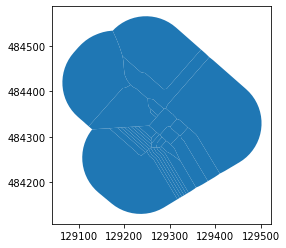

In [18]:
tess5.plot()

In [10]:
keep1 = [163866, 163868, 163930, 163893, 150900, 150901, 150903, 150907, 150623]
delete1 = keep1

In [12]:
tess_fix4 = tess4.loc[tess4.uID.isin(keep1)]

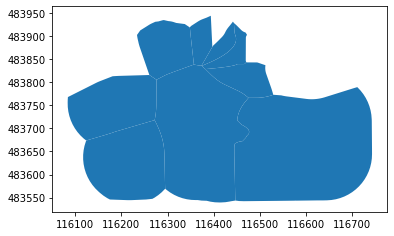

In [13]:
tess_fix4.plot()

In [19]:
keep2 = [19440, 19433, 19449, 19450, 19451, 19452, 19453, 19448, 19446, 19445, 19454, 19438, 19437, 19436, 19435, 19434, 19444, 19443, 19442,
         19457, 19455, 19359, 19352]
delete2 = keep2

In [20]:
tess_fix5 = tess5.loc[tess5.uID.isin(keep2)]

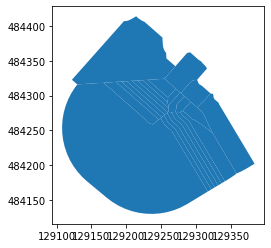

In [21]:
tess_fix5.plot()

In [31]:
keep3 = [171553, 171643, 171554]

In [32]:
tess_fix3 = tess3.loc[tess3.uID.isin(keep3)]

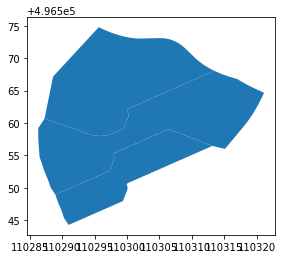

In [33]:
tess_fix3.plot()

In [22]:
fix = tess_fix4.append(tess_fix5)

In [23]:
fix

,uID,geometry
1,150623,"POLYGON ((116239.913 483876.229, 116239.753 48..."
5,150900,"POLYGON ((116514.314 483818.186, 116524.471 48..."
6,150901,"POLYGON ((116451.692 483839.550, 116449.038 48..."
8,150903,"POLYGON ((116377.335 483837.072, 116374.263 48..."
12,150907,"POLYGON ((116393.366 483870.265, 116392.671 48..."
22,163866,"POLYGON ((116213.514 483544.461, 116213.016 48..."
24,163868,"POLYGON ((116182.670 483691.616, 116177.612 48..."
25,163893,"POLYGON ((116447.138 483543.568, 116445.016 48..."
29,163930,"POLYGON ((116295.051 483569.362, 116295.042 48..."
0,19352,"POLYGON ((129262.821 484333.186, 129262.789 48..."


In [24]:
delete = keep1 + keep2

In [25]:
delete

[163866,
 163868,
 163930,
 163893,
 150900,
 150901,
 150903,
 150907,
 150623,
 19440,
 19433,
 19449,
 19450,
 19451,
 19452,
 19453,
 19448,
 19446,
 19445,
 19454,
 19438,
 19437,
 19436,
 19435,
 19434,
 19444,
 19443,
 19442,
 19457,
 19455,
 19359,
 19352]

In [26]:
tessellation = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/queen.gpkg')

In [27]:
tessellation.shape

(252387, 2)

In [28]:
tessellation = tessellation.loc[~tessellation.uID.isin(delete)]

In [29]:
tessellation.shape

(252355, 2)

In [30]:
tessellation = tessellation.append(fix)

In [31]:
tessellation.shape

(252387, 2)

In [ ]:
#Check in QGIS and fix invalid using buffer

In [33]:
validity = tessellation.is_valid

In [34]:
invalid = tessellation[~validity]

In [35]:
invalid

,uID,geometry
61827,61879,"POLYGON ((119459.775 486447.097, 119459.587 48..."
89188,89265,"POLYGON ((121793.326 485686.579, 121793.103 48..."
115635,115742,"POLYGON ((123043.512 486728.641, 123043.967 48..."
118791,118902,"POLYGON ((124694.401 487253.716, 124694.392 48..."
163791,163931,"POLYGON ((116422.661 483648.215, 116423.015 48..."
172621,172773,"POLYGON ((109276.471 475090.592, 109269.288 47..."


In [43]:
for ix, r in invalid.iterrows():
    g = r.geometry.buffer(0)
    tessellation.loc[ix]['geometry'] = g

<ipython-input-43-c1850b5b675a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tessellation.loc[ix]['geometry'] = g


In [61]:
tessellation[~validity].is_valid

61827     True
89188     True
115635    True
118791    True
163791    True
172621    True
dtype: bool

In [51]:
from shapely.wkt import loads

In [55]:
buf = invalid.geometry.apply(lambda x: x.buffer(0))

In [59]:
buf

61827     POLYGON ((119383.892 486494.887, 119384.996 48...
89188     MULTIPOLYGON (((121746.012 485769.558, 121745....
115635    POLYGON ((122958.534 486841.761, 122959.508 48...
118791    POLYGON ((124686.489 487250.862, 124652.174 48...
163791    POLYGON ((116373.923 483835.902, 116374.760 48...
172621    POLYGON ((109167.054 475162.540, 109166.488 47...
Name: geometry, dtype: geometry

In [60]:
tessellation.loc[buf.index, 'geometry'] = buf

In [63]:
tessellation

,uID,geometry,"(61827, geometry)"
0,0,"POLYGON ((130268.154 483433.821, 130294.555 48...","POLYGON ((119383.892102206 486494.8868892348, ..."
1,1,"POLYGON ((130420.569 483356.366, 130419.833 48...","POLYGON ((119383.892102206 486494.8868892348, ..."
2,2,"POLYGON ((124328.475 476789.267, 124328.217 47...","POLYGON ((119383.892102206 486494.8868892348, ..."
3,3,"POLYGON ((123705.510 476792.535, 123707.584 47...","POLYGON ((119383.892102206 486494.8868892348, ..."
4,4,"POLYGON ((124366.834 476844.198, 124370.599 47...","POLYGON ((119383.892102206 486494.8868892348, ..."
...,...,...,...
24,19452,"POLYGON ((129336.923 484174.133, 129285.498 48...","POLYGON ((119383.892102206 486494.8868892348, ..."
25,19453,"POLYGON ((129341.780 484177.034, 129290.361 48...","POLYGON ((119383.892102206 486494.8868892348, ..."
26,19454,"POLYGON ((129266.341 484292.102, 129266.341 48...","POLYGON ((119383.892102206 486494.8868892348, ..."
27,19455,"POLYGON ((129301.521 484283.548, 129301.110 48...","POLYGON ((119383.892102206 486494.8868892348, ..."


In [64]:
tessellation[['uID', 'geometry']].to_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/queen.gpkg', layer='tessellation', driver='GPKG')